# To start, we will import the necessary libraries and load the dataset:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('house.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])


In [3]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [ ]:
Check most fequent 

In [4]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

he code you provided is creating a plot to illustrate the impact of missing values in the "GarageQual" variable on the "SalePrice" variable in a housing dataset. The plot shows two kernel density estimates (KDEs) of the "SalePrice" variable: one for houses with "GarageQual" value "TA" and one for houses with missing values in "GarageQual". The KDEs are overlaid on top of each other to compare their distributions.

Text(0.5, 1.0, 'GarageQual')

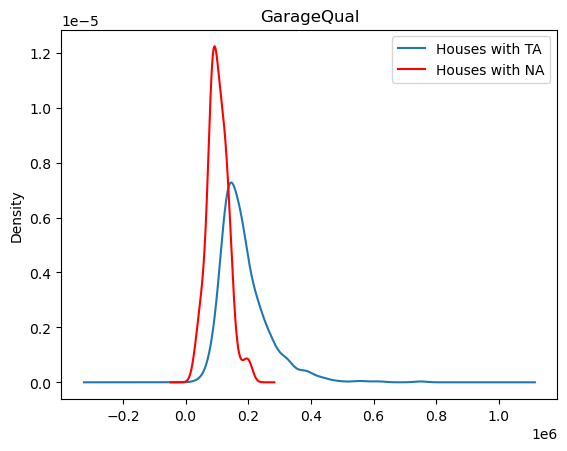

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')

In [13]:
temp = df[df['GarageQual']=='TA']['SalePrice']

In [14]:
#filling missing value withe most frequent 
df['GarageQual'].fillna('TA', inplace=True)

# After filling with mode

Text(0.5, 1.0, 'GarageQual')

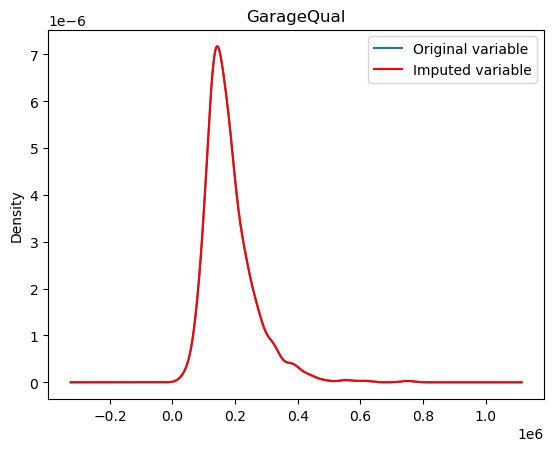

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('GarageQual')

<AxesSubplot:>

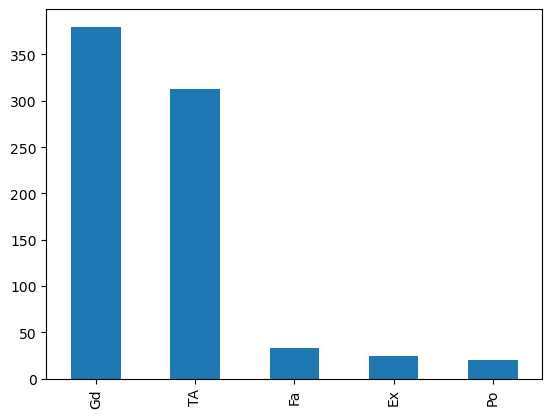

In [16]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [17]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

Text(0.5, 1.0, 'FireplaceQu')

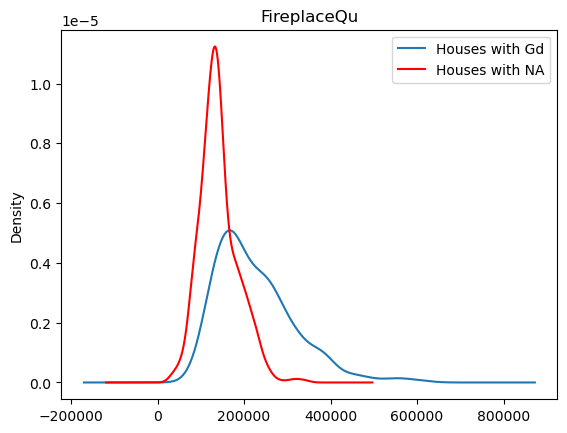

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

In [19]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']

df['FireplaceQu'].fillna('Gd', inplace=True)



<AxesSubplot:>

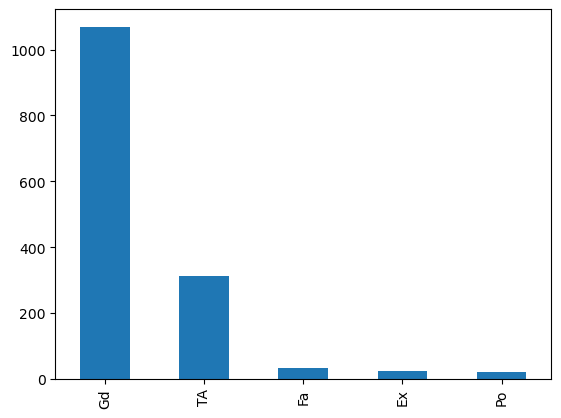

In [20]:
#after fill with mode
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

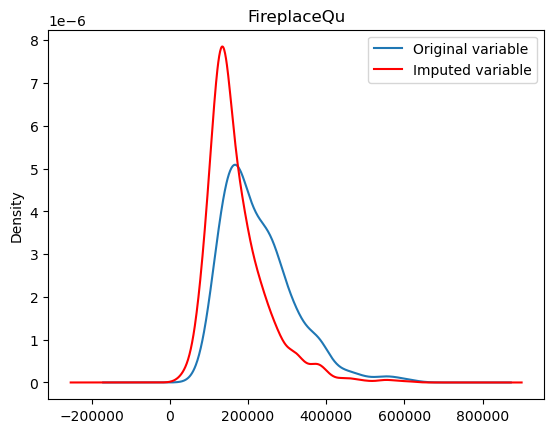

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('FireplaceQu')

# sklearn

In [ ]:
#
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)


from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='most_frequent')


X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

imputer.statistics_